# The Convolutional Classifier

**1. Introduction**

This course will introduce you to the fundamental ideas of computer vision. Our goal is to learn how a neural network can "understand" a natural image well-enough to solve the same kinds of problems the human visual system can solve.

The neural networks that are best at this task are convolutional neural networks (Sometimes we say covnet of CNN instead). Convolution is the mathematical operation that gives the layers of a covnet their unique structure. 

W will apply these ideas to the problem of image classification : given a picture, can we train a computer to tell us what it's a picture of? You may have seen aps that can identify a species of plant from a photograph. That's an image classifier. 

While our focus will be on image classification, what we'll learn is relevant to every kind of computer vision problem. 

**2. The Convolutional Classifier**

A covnet used for image classification consists of two parts : a convolutional base and a dense head.

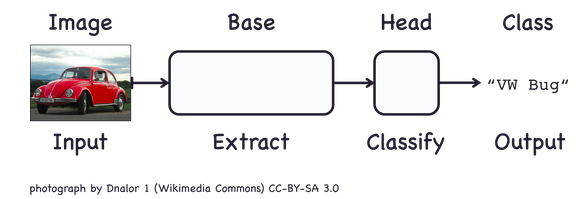

The base is used to extract features from an image. It is formed primarily of layers performing the convolution operation, but often includes other kinds of layers as well. 

The head is used to determine the class of the image. It is formed primarily of dense layers, but might include other layers like dropout. 

What do we mean by visual picture? A feature could be a line, a color, a texture, a shape, a pattern or some complicated combination. 

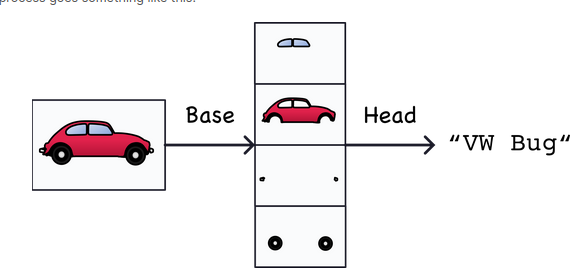

**3. Training the Classifier**

The goal of the network during training is to learn two things : 

1. which features to extract from an image(base),
2. which class goes with what features(head)

These days, covnets are rarely trained from scratch. More often, we reuse the base of a pretrained model. To the pretrained base we then attach an untrained head. In other words, we reuse the part of a network that has already learned to do 1. and attach to it some fresh layers to learn 2. 

Because the head usually consists of only a few dense layers, very accurate classifier can be created from relatively little data. 

Reusing a pretrained model is a technique known as transfer learning. It is so effective, that almost every image classifier these days will make use of it.

**4. Example**

Throughout this course, we're going to creating classifiers that attemp to solve the following problem : is this a picture of a Car or of a Truck? Our dataset is about 10,000 picture of various automobiles, around half cars and half trucks.

**Step1 : Load data**


In [3]:
# Imports 

import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: SystemError: <built-in method __contains__ of dict object at 0x7f54b0c45340> returned a result with an error set

In [ ]:
# Reproducability

def set_seed(seed = 31415) : 
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.entiron['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)


# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [ ]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '../input/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '../input/car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

In [ ]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

**Step 2 : Define Pretrained Base**

The most commonly used dataset for pretrianing is ImageNet, a large dataset of many kind of natural images. Keras includes a variety models pretrained on ImageNet in its applications module. The pretrained model we'll use is called VGG16.


In [ ]:
pretrained_base = tf.keras.models.load_model(
    '../input/cv-course-models/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

**Step 3 : Attach Head**

Next, we attach the classifier head. For this example, we'll use a layer of hidden units followed by layer to tarnsform the outputs to a probability score for class 1, Truck. The Flatten layer transforms the two dimensional outputs of the base into the one dimensional inputs needed by the head.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

**Step 4 : Train**

Finally, let's train the model. Since this is a two-class problem, we'll use the binary versions of crossentropy and accuracy. The adam optimzer generally performs well, so we'll choose it as well.

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=0,
)

When training a neural network, it's always a good iedea to examine the loss and metric plots. The history object contains this information in a dictionary history.history. We can use Pandas to convert this dictionary to a dataframe and plot it with a bulit-in method. 

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# Convolution and ReLU

# Maximum Pooling

# The Sliding Window

# Custom Convnets

# Data Argumentation